In [ ]:
# 비선형분류에도 적절한 인공신경망
# 그런데!! 설명력이 좀 부족함!!

In [1]:
import mglearn

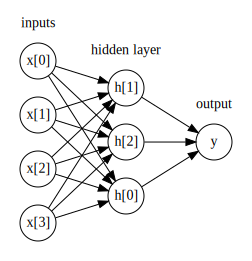

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

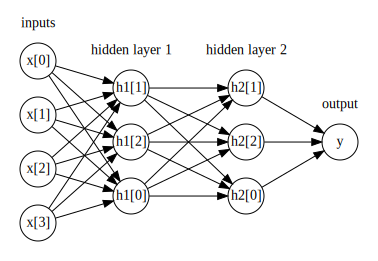

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0).fit(X_train, y_train)
model

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [10]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8625
0.85


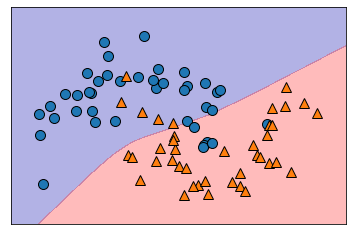

In [12]:
import matplotlib.pyplot as plt

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [13]:
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10])
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7375
0.8


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# 100개 유닛으로 3개의 은닉층
model = MLPClassifier(random_state=0, hidden_layer_sizes=[100,100,100])
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9875
0.95


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


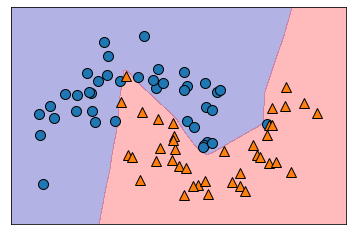

In [15]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

In [ ]:
# 퍼셉트론

In [16]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1,x2]) # 입력값
    w = np.array([0.5,0.5]) # 가중치
    b = -0.7 # 절편, 편향
    tmp = np.sum(w*x)+b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0,0),(1,0),(0,1),(1,1)]:
    y = AND(xs[0],xs[1])
    print(xs, " -> ", y)

-0.7
(0, 0)  ->  0
-0.19999999999999996
(1, 0)  ->  0
-0.19999999999999996
(0, 1)  ->  0
0.30000000000000004
(1, 1)  ->  1


In [17]:
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0,0),(1,0),(0,1),(1,1)]:
    y = NAND(xs[0],xs[1])
    print(str(xs), " -> ", str(y))

0.7
(0, 0)  ->  1
0.19999999999999996
(1, 0)  ->  1
0.19999999999999996
(0, 1)  ->  1
-0.30000000000000004
(1, 1)  ->  0


In [18]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0,0),(1,0),(0,1),(1,1)]:
    y = OR(xs[0],xs[1])
    print(str(xs), " -> ", str(y))

-0.2
(0, 0)  ->  0
0.3
(1, 0)  ->  1
0.3
(0, 1)  ->  1
0.8
(1, 1)  ->  1


In [19]:
# XOR 연산을 위해서는 입력층을 하나 더 추가하면 가능
# 다층 퍼셉트론
# XOR는 

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(xs[0],xs[1])
    print(str(xs), " -> ", str(y))

0.7
-0.2
-0.19999999999999996
(0, 0)  ->  0
0.19999999999999996
0.3
0.30000000000000004
(1, 0)  ->  1
0.19999999999999996
0.3
0.30000000000000004
(0, 1)  ->  1
-0.30000000000000004
0.8
-0.19999999999999996
(1, 1)  ->  0


In [ ]:
# 활성화 함수

/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_14705/2465363591.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


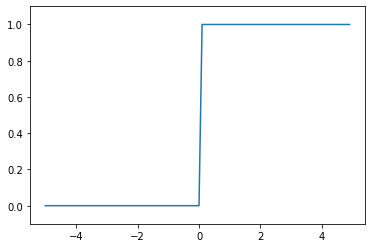

In [21]:
# 계단함수
# 출력값이 0보다 크면 1, 작으면 0을 리턴

def step_function(x):
    return np.array(x > 0, dtype=np.int) # 데이터 타입을 정수로 했기 때문에 True면 1, False면 0을 리턴

X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)
plt.plot(X,y)
plt.ylim(-0.1, 1.1)
plt.show()

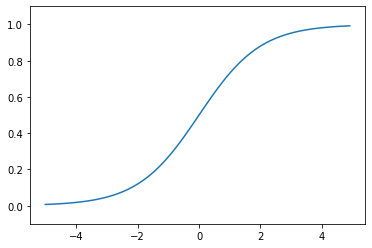

In [22]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X,y)
plt.ylim(-0.1, 1.1)
plt.show()

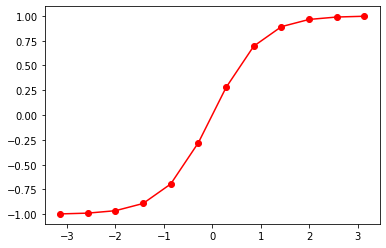

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 12)
y = np.tanh(X)

plt.plot(X,y,c='r',marker='o')
plt.show()

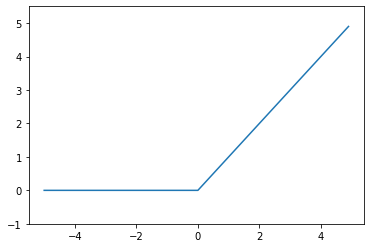

In [24]:
# 은닉층에 relu(), 출력층에 sigmoid() 혹은 tanh()

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.ylim(-1.0, 5.5)
plt.show()

In [ ]:
# 활성화 함수activation function
# 출력할 때 어떻게 처리할 것인지를 결정하는 활성화 함수

# sigmoid - output layer(이진분류) : 0.0에서 1.0 사이의, 확률값을 출력
# tanh : sigmoid보다 큰 범위를 다루는데 보통 sigmoid 씀
# relu - hidden layer : 양수는 그대로, 음수는 0으로 출력
# softmax (다분류)

In [25]:
# 소프트맥스
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(np.dot(a,b))

[[19 22]
 [43 50]]


In [26]:
x = np.array([1,0.5]) # 입력값, 1행 2열

# 첫번째 은닉층
w1 = np.array([[0.1, 0.3, 0.5], [0.2,0.4,0.6]]) #가중치, 2행 3열
b1 = np.array([0.1,0.2,0.3]) # 편향, 1행 3열
# 1행2열, 2행3열은 안의 2열, 2행이 맞음. 결과물은 1행 3열

a1 = np.dot(x,w1)+b1 # 첫번째 입력값과 은닉층의 총합
z1 = sigmoid(a1) # 활성화함수를 통해 결과물 내기
print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
# 두번째 은닉층
w2 = np.array([[0.1, 0.4], [0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])
a2 = np.dot(z1,w2)+b2
z2 = sigmoid(a2)
print(a2)
print(z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [28]:
# y=x인 함수 : 항등함수
# 회귀분석할 때 항등함수가 쓰임

def identity_function(x):
    return x

In [29]:
w3 = np.array([[0.1, 0.3], [0.2,0.4]])
b3 = np.array([0.1,0.2])
a3 = np.dot(z2,w3)+b3
y = identity_function(a3)
print(y)

[0.31682708 0.69627909]


In [30]:
print(np.exp(1))
print(np.log(1))
print(np.log(np.exp(1)))
print(np.log(10))
print("==============================")
print(np.log10(1))
print(np.log10(10))
print(np.log10(100))

2.718281828459045
0.0
1.0
2.302585092994046
0.0
1.0
2.0


In [31]:
# 답을 여러 개 중에 하나 선택하고 싶을 때

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수함수의 합계
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3,2.9,4.0])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]


In [33]:
# 너무 큰 값이 들어가면 무한대 오류가 일어남

a = np.array([1000,1100,1200])
print(softmax(a))

[nan nan nan]


/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_14705/1123993238.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_14705/1123993238.py:4: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [34]:
a = np.array([1010,1000,900])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a-c)
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_14705/1663198177.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_14705/1663198177.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [35]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 최대값을 빼면 무한대 문제 해결
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([1000,1100,1200])
print(softmax(a))

[1.38389653e-87 3.72007598e-44 1.00000000e+00]


In [36]:
np.sum(softmax(a))

1.0

In [37]:
s = np.sum(softmax(a))
idx = np.argmax(softmax(a))
print(idx)
print(a[idx])

2
1200
